Math 76: Final Project
Author: Catherine Chu, Henry Moore

ANN and gradient boosting for maximum temperature in London Heathrow. 
These models are trained based on a data set that includes tabular temporal data from 2010 to 2018. 

In [72]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error


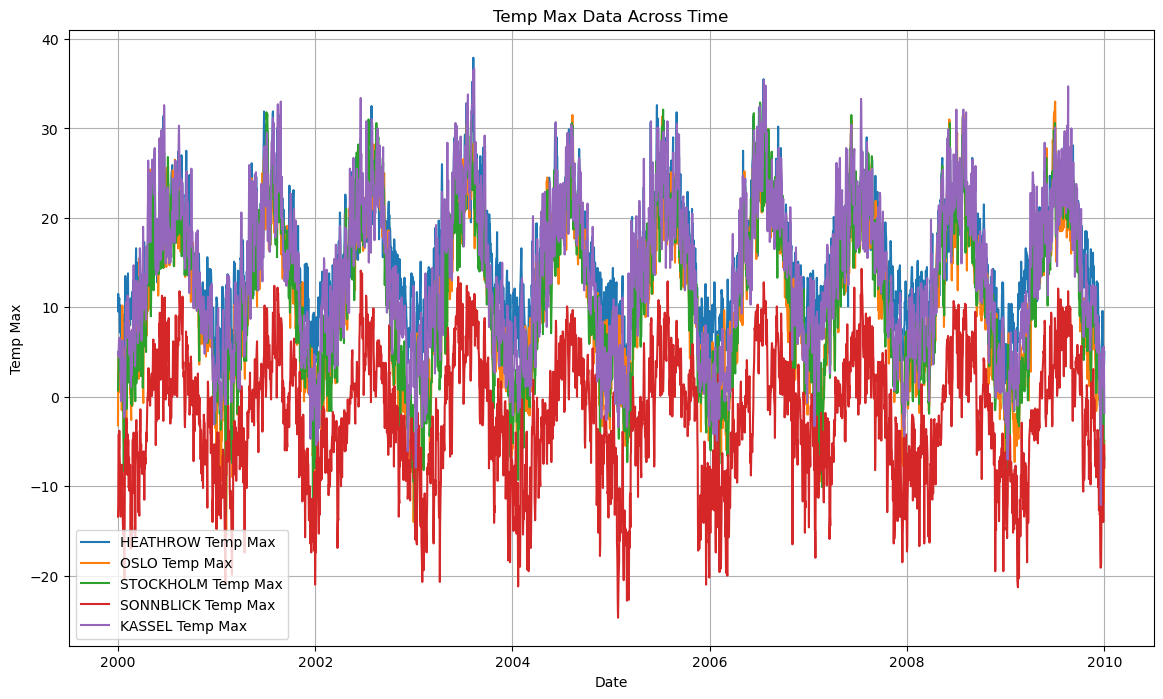

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('weather_prediction_dataset.csv')

# Convert the DATE column to datetime
data['DATE'] = pd.to_datetime(data['DATE'], format='%Y%m%d')
data.set_index('DATE', inplace=True)

# Select cities
cities = ['HEATHROW', 'OSLO', 'STOCKHOLM', 'SONNBLICK', 'KASSEL']

# Plot the Max temperature for selected cities
plt.figure(figsize=(14, 8))

for city in cities:
    plt.plot(data.index, data[f'{city}_temp_max'], label=f'{city} Temp Max')

plt.title('Temp Max Data Across Time')
plt.xlabel('Date')
plt.ylabel('Temp Max')
plt.legend()
plt.grid(True)
plt.show()


In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('weather_prediction_dataset.csv')
df_bbq = pd.read_csv('weather_prediction_bbq_labels.csv')
df.head(20)

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5
5,20000106,1,3,0.85,1.0244,0.56,0.00,5.7,4.2,1.9,...,-0.6,4.0,3.4,0.92,1.0209,0.55,0.20,7.1,3.5,10.7
6,20000107,1,8,0.84,1.0267,0.20,0.00,0.0,4.7,1.8,...,1.7,4.1,2.8,0.96,1.0258,0.27,0.00,6.0,3.3,8.8
7,20000108,1,4,0.79,1.0248,0.54,0.00,4.3,5.6,4.1,...,3.5,6.4,3.6,0.97,1.0210,0.18,0.14,8.2,5.3,11.0
8,20000109,1,8,0.88,1.0243,0.11,0.65,0.0,4.6,3.8,...,3.3,5.1,3.0,0.91,1.0280,0.43,0.02,5.6,3.7,7.6
9,20000110,1,8,0.91,1.0337,0.06,0.09,0.0,2.4,1.4,...,0.0,5.5,1.9,0.94,1.0369,0.58,0.04,1.8,-1.5,5.0


/var/folders/qy/7tndsns52jjg178s5f1n30l80000gn/T/ipykernel_89880/554095862.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_heathrow['BBQ'] = df_bbq['DRESDEN_BBQ_weather'];


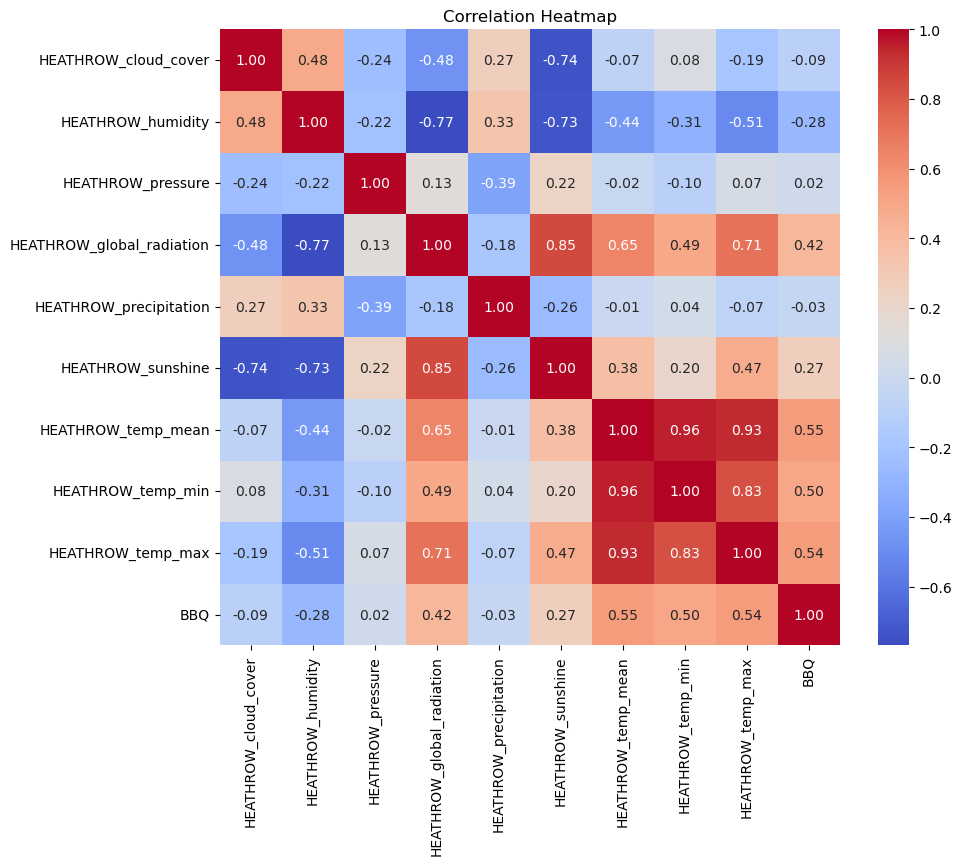

In [75]:
df.columns[51:60]
df_heathrow = df[['HEATHROW_cloud_cover', 'HEATHROW_humidity', 'HEATHROW_pressure',
       'HEATHROW_global_radiation', 'HEATHROW_precipitation',
       'HEATHROW_sunshine', 'HEATHROW_temp_mean', 'HEATHROW_temp_min',
       'HEATHROW_temp_max']]
df_heathrow['BBQ'] = df_bbq['DRESDEN_BBQ_weather'];

df_heathrow.head()

#Reproduce the correlation heatmap for a different country to ensure reproducibility based on the original dataset. 

plt.figure(figsize=(10, 8))
sns.heatmap(df_heathrow.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

First attempt: Training an ANN for Heathrow to predict the temp_max on any given day. 

In [77]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset

# Load the dataset
data = pd.read_csv('weather_prediction_dataset.csv')

# Convert the DATE column to datetime and set it as index
data['DATE'] = pd.to_datetime(data['DATE'], format='%Y%m%d')
data.set_index('DATE', inplace=True)

df_heathrow = data.iloc[:, 51:60]
df_heathrow.dropna(inplace=True)

# Split the data into features (X) and target (y)
# Column 59 is the column that dictates the maximum temperature
X = df_heathrow.iloc[:, :-1].values  # All columns except the last one
y = df_heathrow.iloc[:, -1].values   # Last column as the target

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Create data loaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the ANN
class WeatherANN(nn.Module):
    def __init__(self, input_dim):
        super(WeatherANN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model, loss function, and optimizer
input_dim = X_train.shape[1]
model = WeatherANN(input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 100

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    test_loss = criterion(y_pred, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')

# Choose a random sample to determine how far the predicted value is from the actual value
with torch.no_grad():
    sample_data = torch.tensor([X_test[0]], dtype=torch.float32)
    predicted_value = model(sample_data)
    print(f'Predicted value: {predicted_value.item()}, Actual value: {y_test[0]}')


Epoch [10/100], Loss: 0.7881
Epoch [20/100], Loss: 0.7384
Epoch [30/100], Loss: 0.7194
Epoch [40/100], Loss: 0.7003
Epoch [50/100], Loss: 0.6794
Epoch [60/100], Loss: 0.6690
Epoch [70/100], Loss: 0.6620
Epoch [80/100], Loss: 0.6459
Epoch [90/100], Loss: 0.6398
Epoch [100/100], Loss: 0.6308
Test Loss: 0.7450
Predicted value: 2.1486716270446777, Actual value: 2.2


Hyperparameter tuning the leraning rates to improve accuracy


Testing learning rate: 0.01
Epoch [10/100], Loss: 0.7647
Epoch [20/100], Loss: 0.7208
Epoch [30/100], Loss: 0.7156
Epoch [40/100], Loss: 0.6826
Epoch [50/100], Loss: 0.6694
Epoch [60/100], Loss: 0.6704
Epoch [70/100], Loss: 0.6475
Epoch [80/100], Loss: 0.6172
Epoch [90/100], Loss: 0.6070
Epoch [100/100], Loss: 0.5877
Test Loss for learning rate 0.01: 0.7862

Testing learning rate: 0.001
Epoch [10/100], Loss: 0.7807
Epoch [20/100], Loss: 0.7363
Epoch [30/100], Loss: 0.7169
Epoch [40/100], Loss: 0.6952
Epoch [50/100], Loss: 0.6787
Epoch [60/100], Loss: 0.6696
Epoch [70/100], Loss: 0.6550
Epoch [80/100], Loss: 0.6448
Epoch [90/100], Loss: 0.6369
Epoch [100/100], Loss: 0.6263
Test Loss for learning rate 0.001: 0.7275

Testing learning rate: 0.0005
Epoch [10/100], Loss: 0.8062
Epoch [20/100], Loss: 0.7507
Epoch [30/100], Loss: 0.7263
Epoch [40/100], Loss: 0.7050
Epoch [50/100], Loss: 0.6967
Epoch [60/100], Loss: 0.6903
Epoch [70/100], Loss: 0.6816
Epoch [80/100], Loss: 0.6675
Epoch [90/100

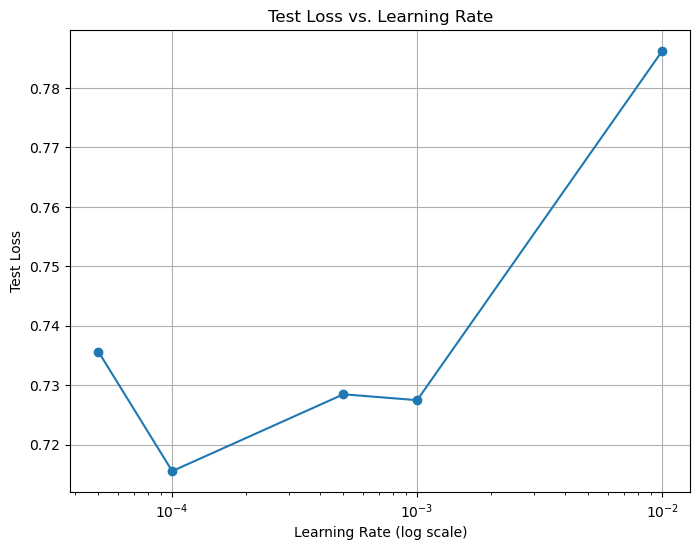

In [78]:
# Additional learning rates to test
learning_rates = [0.01, 0.001, 0.0005, 0.0001, 0.00005]

# Dictionary to store results
results = {}

for lr in learning_rates:
    print(f"\nTesting learning rate: {lr}")
    
    # Initialize the model, loss function, and optimizer with the current learning rate
    model = WeatherANN(input_dim)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # Training the model
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

    # Evaluate the model on the test set
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test_tensor)
        test_loss = criterion(y_pred, y_test_tensor)
        print(f'Test Loss for learning rate {lr}: {test_loss.item():.4f}')
        results[lr] = test_loss.item()

# Generate the figure
import matplotlib.pyplot as plt

# Plotting the results
learning_rates = list(results.keys())
test_losses = list(results.values())

plt.figure(figsize=(8, 6))
plt.plot(learning_rates, test_losses, marker='o')
plt.xscale('log')
plt.title('Test Loss vs. Learning Rate')
plt.xlabel('Learning Rate (log scale)')
plt.ylabel('Test Loss')
plt.grid(True)
plt.show()


Data visualization to plot the learning curve (training and validation loss)

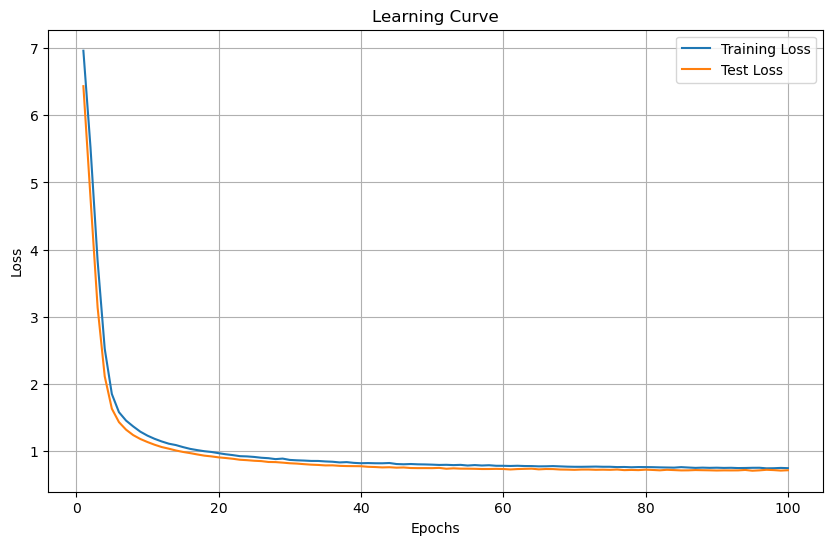

In [79]:
# Plotting the learning curve (Training and Validation Loss)
import matplotlib.pyplot as plt

train_losses = []
test_losses = []

model = WeatherANN(input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_losses.append(running_loss / len(train_loader))

    # Evaluate on the test set
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test_tensor)
        test_loss = criterion(y_pred, y_test_tensor)
        test_losses.append(test_loss.item())

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


Plot the predicted versus the actual values

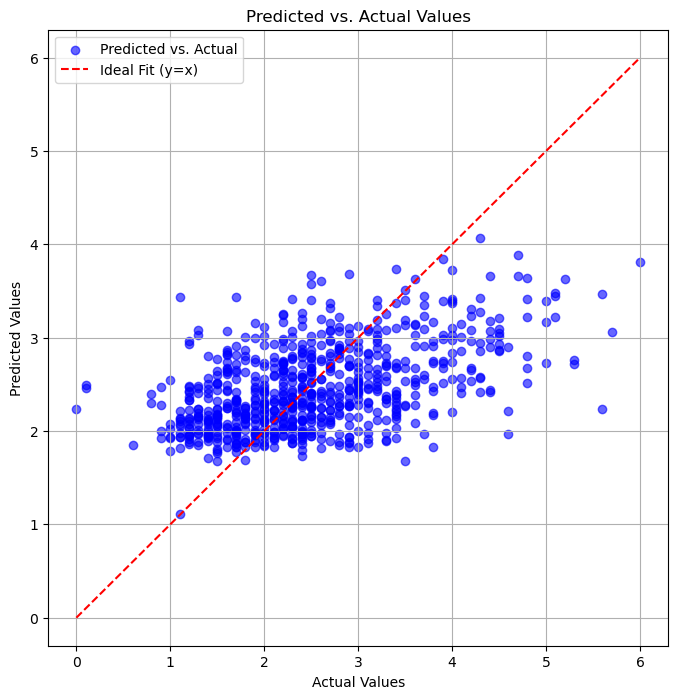

In [80]:
import matplotlib.pyplot as plt

# Generate predictions
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor).numpy()
    y_actual = y_test_tensor.numpy()

# Plot Predicted vs. Actual with improvements for clarity
plt.figure(figsize=(8, 8))

# Scatter plot with different colors
plt.scatter(y_actual, y_pred, alpha=0.6, c='blue', label='Predicted vs. Actual')

# 45-degree line for reference
plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], 'r--', label='Ideal Fit (y=x)')

# Enhancements
plt.title('Predicted vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

plt.show()


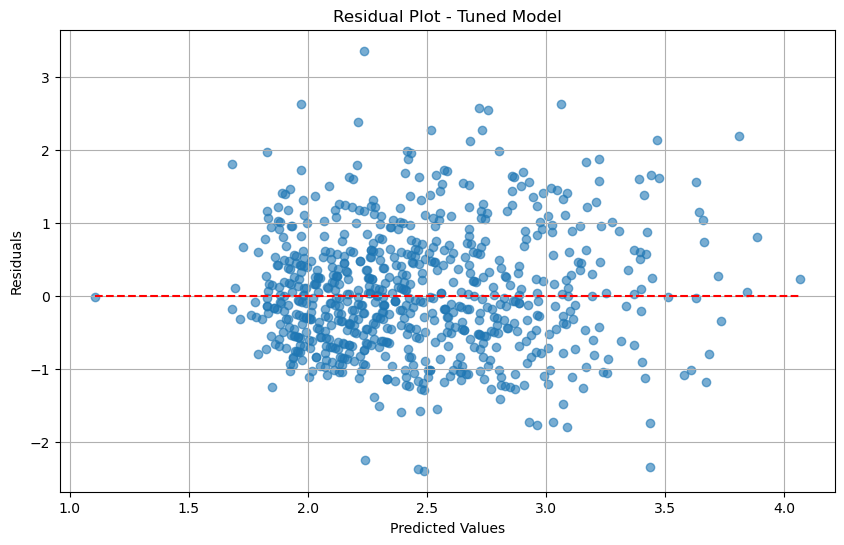

In [81]:
# Plotting the Residual Plot
residuals = y_actual - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.hlines(0, min(y_pred), max(y_pred), colors='r', linestyles='dashed')
plt.title('Residual Plot - Tuned Model')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


In [82]:
class TunedANN(nn.Module):
    def __init__(self, input_dim):
        super(TunedANN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Using the tuned model
model = TunedANN(input_dim)
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-5)


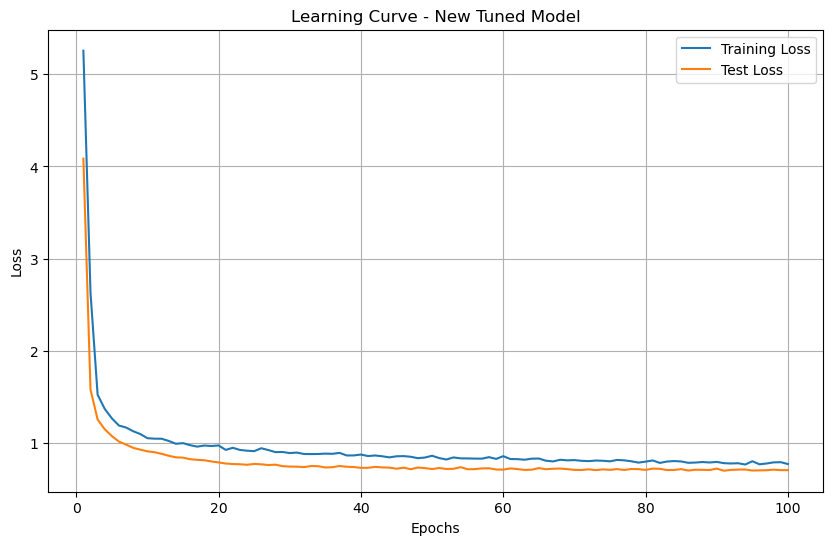

In [83]:
# Plotting the learning curve (Training and Validation Loss)
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_losses.append(running_loss / len(train_loader))

    # Evaluate on the test set
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test_tensor)
        test_loss = criterion(y_pred, y_test_tensor)
        test_losses.append(test_loss.item())

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
plt.title('Learning Curve - New Tuned Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


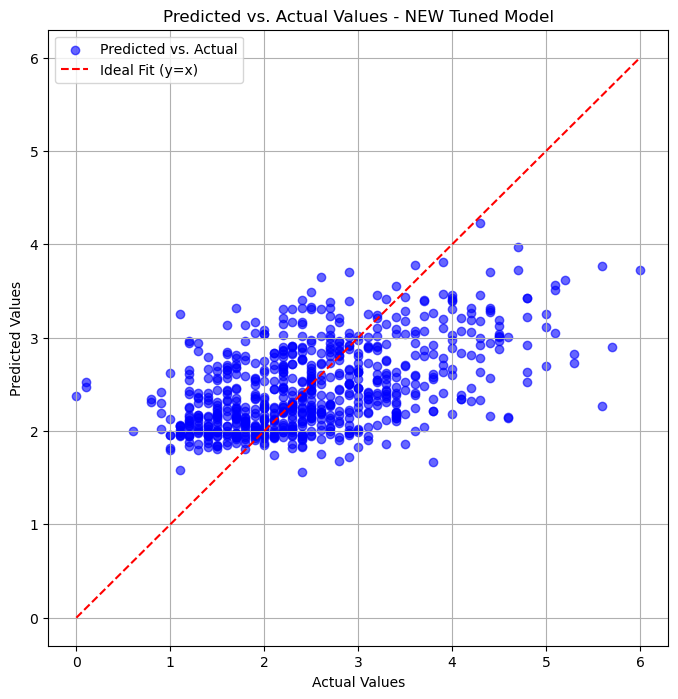

In [84]:
# Plotting Predicted vs. Actual Values
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor).numpy()
    y_actual = y_test_tensor.numpy()

plt.figure(figsize=(8, 8))
plt.scatter(y_actual, y_pred, alpha=0.6, c='blue', label='Predicted vs. Actual')
plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], 'r--', label='Ideal Fit (y=x)')
plt.title('Predicted vs. Actual Values - NEW Tuned Model')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


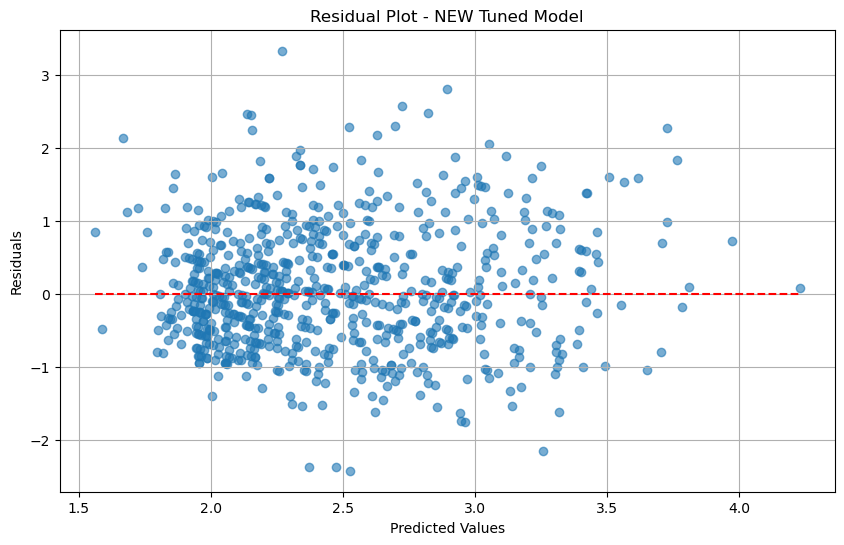

In [85]:
# Plotting the Residual Plot
residuals = y_actual - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.hlines(0, min(y_pred), max(y_pred), colors='r', linestyles='dashed')
plt.title('Residual Plot - NEW Tuned Model')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


trying a cnn

Epoch [10/100], Training Loss: 4.6876, Test Loss: 0.7788
Epoch [20/100], Training Loss: 2.8674, Test Loss: 3.2722
Epoch [30/100], Training Loss: 1.9732, Test Loss: 7.4307
Epoch [40/100], Training Loss: 1.8064, Test Loss: 3.5991
Epoch [50/100], Training Loss: 1.4937, Test Loss: 5.6507
Epoch [60/100], Training Loss: 1.1238, Test Loss: 8.8889
Epoch [70/100], Training Loss: 0.9330, Test Loss: 6.1017
Epoch [80/100], Training Loss: 0.9427, Test Loss: 7.2211
Epoch [90/100], Training Loss: 0.7826, Test Loss: 5.4169
Epoch [100/100], Training Loss: 0.6699, Test Loss: 4.7335


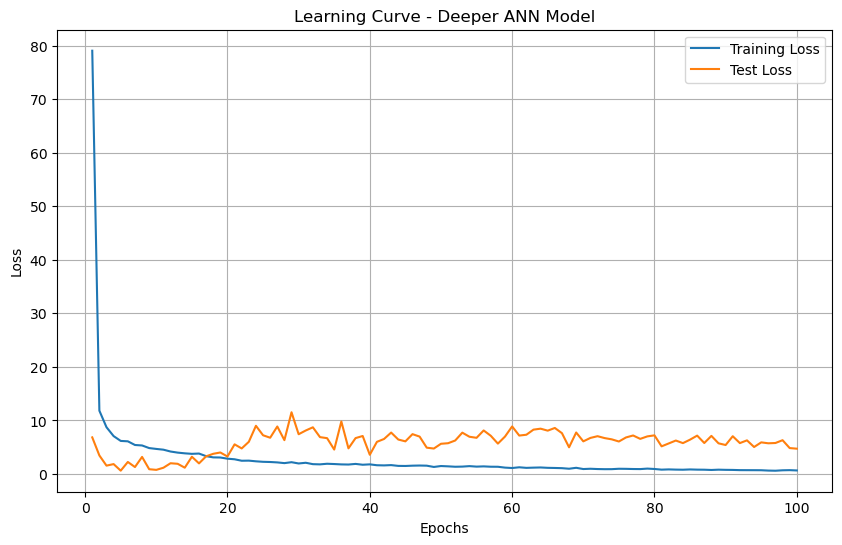

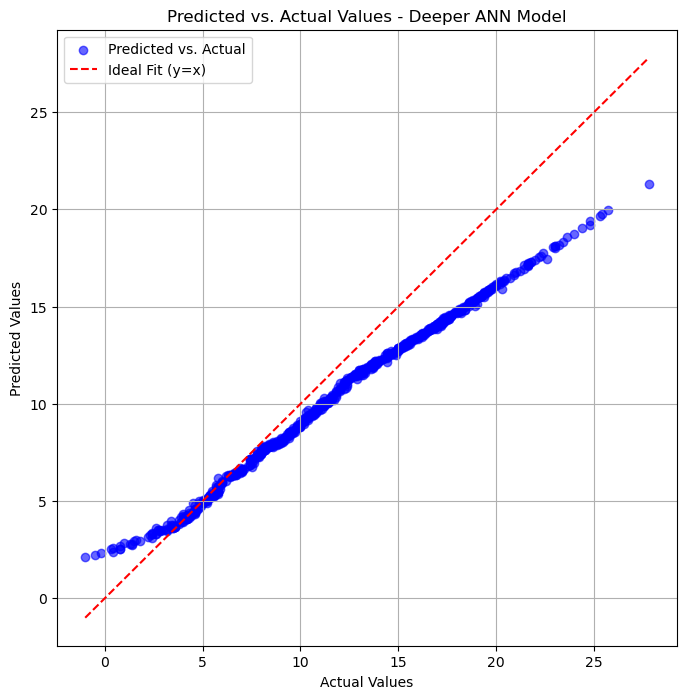

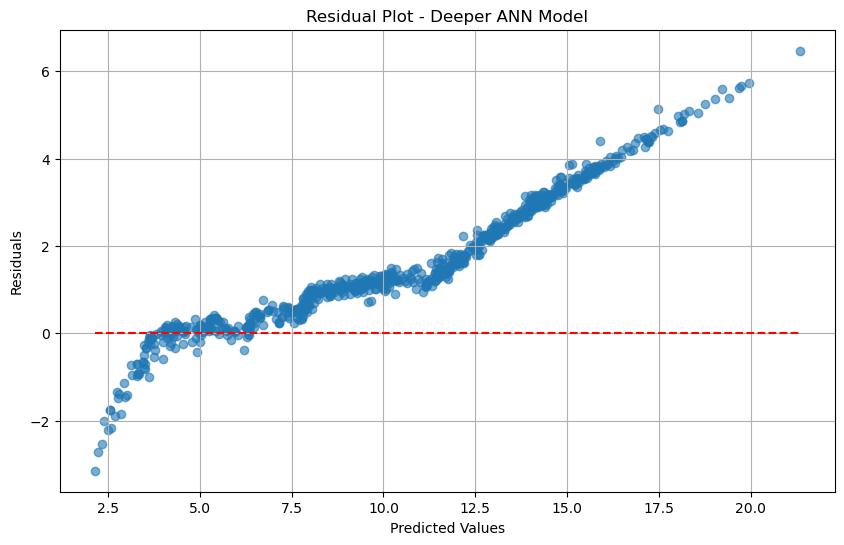

In [86]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset

# Prepare the data (assuming your DataFrame is called 'df')
X = df[['HEATHROW_cloud_cover', 'HEATHROW_humidity', 'HEATHROW_pressure',
        'HEATHROW_global_radiation', 'HEATHROW_precipitation',
        'HEATHROW_sunshine', 'HEATHROW_temp_mean', 'HEATHROW_temp_min',
        'HEATHROW_temp_max']].values

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)


y = df['HEATHROW_temp_max'].values  # Replace with your target column

# Convert data to PyTorch tensors
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Create data loaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define a deeper fully connected neural network model
class DeeperANN(nn.Module):
    def __init__(self, input_dim):
        super(DeeperANN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 16)
        self.fc5 = nn.Linear(16, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.dropout(x)
        x = self.relu(self.fc4(x))
        x = self.fc5(x)
        return x

# Initialize the model
input_dim = X_train.shape[1]
model = DeeperANN(input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

# Training the model
num_epochs = 100
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_losses.append(running_loss / len(train_loader))

    # Evaluate on the test set
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test_tensor)
        test_loss = criterion(y_pred, y_test_tensor)
        test_losses.append(test_loss.item())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {running_loss/len(train_loader):.4f}, Test Loss: {test_loss.item():.4f}')

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
plt.title('Learning Curve - Deeper ANN Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Predicted vs. Actual Plot
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor).numpy()
    y_actual = y_test_tensor.numpy()

plt.figure(figsize=(8, 8))
plt.scatter(y_actual, y_pred, alpha=0.6, c='blue', label='Predicted vs. Actual')
plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], 'r--', label='Ideal Fit (y=x)')
plt.title('Predicted vs. Actual Values - Deeper ANN Model')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# Residual Plot
residuals = y_actual - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.hlines(0, min(y_pred), max(y_pred), colors='r', linestyles='dashed')
plt.title('Residual Plot - Deeper ANN Model')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


Test Mean Squared Error: 0.0019


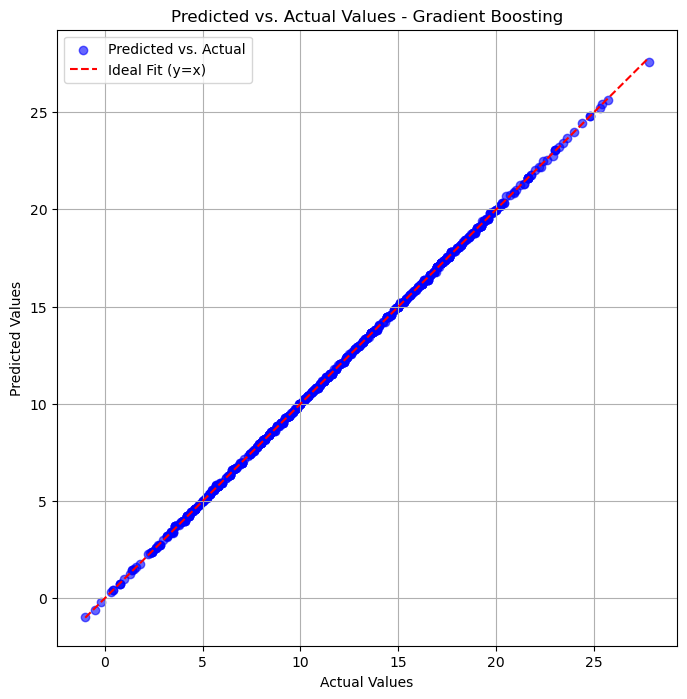

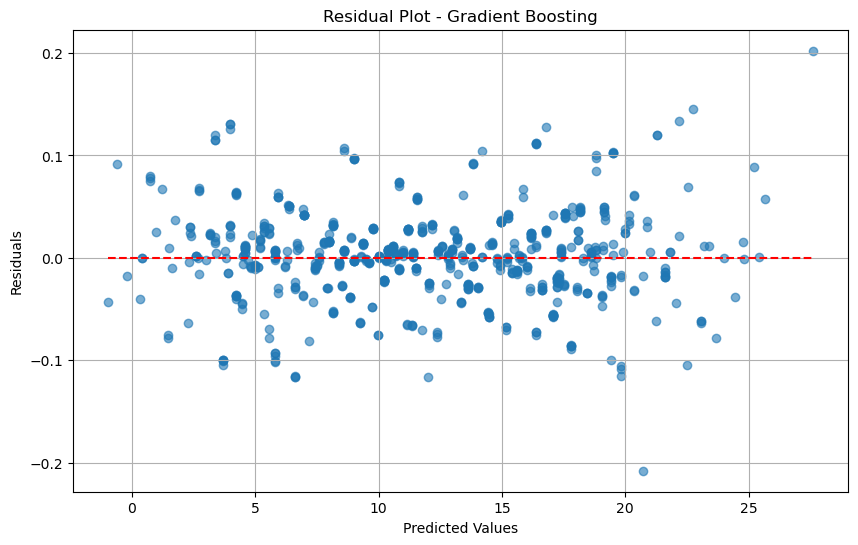

In [87]:
#try gradient boosting

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


X = df[['HEATHROW_cloud_cover', 'HEATHROW_humidity', 'HEATHROW_pressure',
        'HEATHROW_global_radiation', 'HEATHROW_precipitation',
        'HEATHROW_sunshine', 'HEATHROW_temp_mean', 'HEATHROW_temp_min',
        'HEATHROW_temp_max']].values

y = df['HEATHROW_temp_max'].values  # Replace with your target column

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)

# Predict on the test set
y_pred = gbr.predict(X_test)

# Calculate the Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, y_pred)
print(f"Test Mean Squared Error: {mse:.4f}")

# Plot Predicted vs. Actual Values
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.6, c='blue', label='Predicted vs. Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Ideal Fit (y=x)')
plt.title('Predicted vs. Actual Values - Gradient Boosting')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# Residual Plot
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.hlines(0, min(y_pred), max(y_pred), colors='r', linestyles='dashed')
plt.title('Residual Plot - Gradient Boosting')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


In [52]:
from sklearn.model_selection import cross_val_score

# Define the model
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(gbr, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive MSE
cv_mse_scores = -cv_scores

print(f"Cross-Validation MSE Scores: {cv_mse_scores}")
print(f"Mean Cross-Validation MSE: {cv_mse_scores.mean():.4f}")
print(f"Standard Deviation of Cross-Validation MSE: {cv_mse_scores.std():.4f}")


Cross-Validation MSE Scores: [0.00179052 0.01381632 0.00230131 0.00213327 0.00175815]
Mean Cross-Validation MSE: 0.0044
Standard Deviation of Cross-Validation MSE: 0.0047


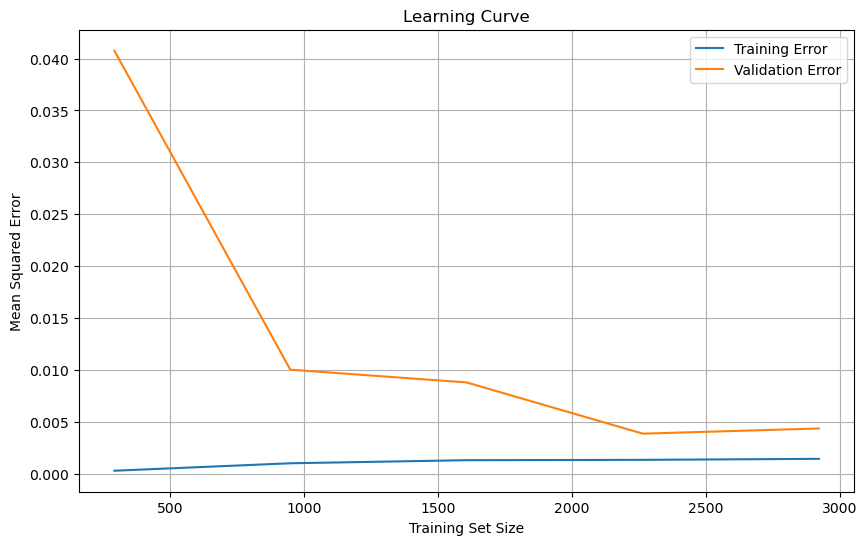

In [53]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(gbr, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Convert to positive MSE
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Error')
plt.plot(train_sizes, test_scores_mean, label='Validation Error')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.show()
